# PREAMBULE :

# INSTALLATIONS RECURRENTES :

# Installation IMBLEARN :

In [1]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


# Installation PANDAS :

In [2]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


# Installation SCIKIT LEARN :

In [3]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


# Installation SEABORN :

In [4]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


# Installation SHAP :

In [5]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


# IMPORTATION BIBLIOTHEQUES :

In [6]:
# Importation des Bibliothèques :

import matplotlib.colors 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import os
import warnings
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import time
from sklearn import cluster, metrics
from sklearn import manifold, decomposition
import logging
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
from time import time
from math import pi
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import model_selection
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.decomposition import PCA
from sklearn.metrics import homogeneity_score, adjusted_rand_score, adjusted_mutual_info_score
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.decomposition import PCA
from sklearn.metrics import homogeneity_score, adjusted_rand_score, adjusted_mutual_info_score
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.model_selection import train_test_split, StratifiedKFold
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, precision_score, recall_score 
from sklearn.metrics import classification_report, confusion_matrix, roc_curve
from imblearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import cross_val_predict, cross_val_score, learning_curve, cross_validate
from sklearn.feature_selection import RFECV

# I LECTURE ET SPLIT DES DATASETS ENCODEES ET STANDARDISEES :

# A- LECTURE :

Nos données sont scindées en 3 datasets :
    
- Train

- Test

- Target

In [7]:
# Lecture du Dataset Principal :

data_train_final_feat_eng_preprocessed = pd.read_csv('data_train_final_feat_eng_preprocessed.csv', index_col='SK_ID_CURR', encoding ='utf-8')

data_train_final_feat_eng_preprocessed.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100002,0.0,0.615,-0.198521,-0.011205,-0.224490,-0.002626,0.865181,0.553366,0.156504,0.439705,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
100003,0.0,1.365,1.448012,0.597361,1.540816,-0.820550,-0.139634,0.251779,0.606637,1.148895,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100004,0.0,-0.885,-0.702740,-1.004482,-0.714286,-0.472638,-0.453432,0.778872,0.044611,0.280341,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0
100006,0.0,-0.135,-0.372874,0.264691,-0.346939,-0.580533,-0.447792,-0.761357,-0.974312,0.316789,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0
100007,0.0,-0.285,-0.000986,-0.168078,0.142857,0.525969,-0.575320,-0.760810,0.035287,-0.079100,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0


In [8]:
# Lecture du Dataset Principal :

data_test_final_feat_eng_preprocessed = pd.read_csv('data_test_final_feat_eng_preprocessed.csv', index_col='SK_ID_CURR', encoding ='utf-8')

data_test_final_feat_eng_preprocessed.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100001,0.0,-0.20,0.286707,-0.290382,0.133333,0.000000,-0.483966,-0.302900,-0.122341,0.883297,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
100005,0.0,-0.52,-0.548393,-0.454693,-0.533333,0.908077,-0.319143,-1.452202,-0.832636,0.587527,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0
100013,0.0,0.40,0.514683,2.244264,0.577778,0.013453,-0.595575,-1.446294,0.416498,-0.098104,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0
100028,2.0,1.40,2.715030,1.175203,2.911111,0.404245,0.253326,-0.054243,0.447983,-0.355215,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
100038,1.0,0.20,0.423545,0.302202,0.566667,-0.472638,0.384400,-0.228786,0.088157,-0.374909,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0


# Variable Cible :

In [9]:
# Lecture du Dataset TARGET :

TARGET = pd.read_csv('TARGET.csv', index_col='SK_ID_CURR')

TARGET.head()

,TARGET
SK_ID_CURR,
100002,1.0
100003,0.0
100004,0.0
100006,0.0
100007,0.0


# B- SPLIT : TRAIN 70% - TEST 30 % :

In [10]:
# Train / Test Split :

X_train, X_test, y_train, y_test = train_test_split(data_train_final_feat_eng_preprocessed.values, TARGET.values, test_size=0.3, random_state=42)

In [11]:
# Train / Test Shape :

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((215257, 312), (92254, 312), (215257, 1), (92254, 1))

In [12]:
# Sauvegarde :

pd.DataFrame(X_train).to_csv('X_train.csv',index=False)

pd.DataFrame(X_test).to_csv('X_test.csv',index=False)

pd.DataFrame(y_train).to_csv('y_train.csv',index=False)

pd.DataFrame(y_test).to_csv('y_test.csv',index=False)

# II MODELISATIONS : 

Le SMOTE, acronyme pour Synthetic Minority Oversampling TEchnique, est une méthode de suréchantillonnage des observations minoritaires.

# A- RESAMPLING : OVERSAMPLING : SMOTE :

On procède à un sur-échantillonnage (oversampling).

Le nombre d’individus minoritaires est augmenté pour qu’ils aient plus d’importance lors de la modélisation. Le but est de créer des Observations synthétiques.

Le nombre de plus proches voisins est au nombre de 5.

In [13]:
# Oversampling SMOTE :

from imblearn.over_sampling import SMOTE

sm = SMOTE(sampling_strategy='auto', k_neighbors=5,
           n_jobs=-1, random_state=14) 

X_train_oversamp, y_train_oversamp = sm.fit_resample(X_train, y_train)

In [14]:
# Vérification :

X_train_oversamp.shape, y_train_oversamp.shape

((395690, 312), (395690,))

In [15]:
# Sauvegarde :

pd.DataFrame(X_train_oversamp).to_csv('X_train_oversamp.csv',index=False)

pd.DataFrame(y_train_oversamp).to_csv('y_train_oversamp.csv',index=False)

# B- MODELES DE CLASSIFICATION :

In [16]:
# Résultats :

results = pd.DataFrame({})

# 1- SECTEUR BANCAIRE :

La Métrique Métier, dédiée au Secteur Bancaire, consiste à calculer le gain obtenu pour l'ensemble des individus du dataset. On va donc pénaliser le défaut de paiement (avec une pondération importante correspondant aux potentielles pertes en capital) et majorer un remboursement (faible pondération correspondant aux intérêts générés). 

Pondération Arbitraire :
    
- fn_valeur = - 2.5
- tp_valeur = 0
- tn_valeur = 1.5
- fp_valeur = - 1

In [17]:
# Importation :

from sklearn.metrics import make_scorer

In [18]:
# Fonction Métrique Bancaire :

def score_bancaire(y_true, y_pred, fn_valeur=-2.5, fp_valeur=-1, tp_valeur=0, tn_valeur=1.5):
    
    cm0 = confusion_matrix(y_true,y_pred)
    
    tn = cm0[0, 0]
    fn = cm0[1, 0]
    fp = cm0[0, 1]
    tp = cm0[1, 1]
    
    
    Gain_total = tp * tp_valeur + tn * tn_valeur + fp * fp_valeur + fn * fn_valeur
    
    Gain_maximal = (fp + tn) * tn_valeur + (fn + tp) * tp_valeur
    
    Gain_minimal = (fp + tn) * fp_valeur + (fn + tp) * fn_valeur
    
    Gain_normalise = (Gain_total - Gain_minimal)/(Gain_maximal - Gain_minimal)
    
    return Gain_normalise 

# 2- BASELINE : REGRESSION LOGISTIQUE :

La régression logistique est un modèle statistique permettant d'étudier les relations entre un ensemble de variables qualitatives Xi et une variable qualitative Y. 
Il s'agit d'un modèle linéaire généralisé utilisant une fonction logistique comme fonction de lien.

# - ENTRAINEMENT DU MODELE :

In [19]:
# Importation :

from sklearn.linear_model import LogisticRegression

In [20]:
# Instanciation :

logreg = LogisticRegression()

In [21]:
# Sauvegarde Modèle :

filename = 'classifier_logreg_model.sav'

pickle.dump(logreg, open(filename, 'wb'))

In [22]:
# Fit Modèle :

logreg.fit(X_train_oversamp, y_train_oversamp)

/Users/sylvaincarlevato/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

# - RESULTATS DE PREDICTION :

In [23]:
# Prédiction :

y_pred_test1 = logreg.predict(X_test)

y_pred_test1

array([0., 0., 0., ..., 1., 0., 0.])

# - MATRICE DE CONFUSION :

Une matrice de confusion est un outil permettant de résumer les performances d'un algorithme de classification. Une matrice de confusion nous donnera une image claire des performances du modèle de classification et des types d'erreurs produites par le modèle. Il nous donne un résumé des prédictions correctes et incorrectes ventilées par chaque catégorie. 

Le résumé est représenté sous forme de tableau.

Quatre types de résultats sont possibles lors de l'évaluation des performances d'un modèle de classification. 

Ces quatre résultats sont décrits ci-dessous : 

- Vrais positifs (TP) : Les vrais positifs se produisent lorsque nous prédisons qu'une observation appartient à une certaine classe et que l'observation appartient réellement à cette classe.

- Vrais négatifs (TN) : Les vrais négatifs se produisent lorsque nous prédisons qu'une observation n'appartient pas à une certaine classe et que l'observation n'appartient pas à cette classe.

- Faux positifs (FP) : Les faux positifs se produisent lorsque nous prédisons qu'une observation appartient à une certaine classe, mais que l'observation n'appartient pas à cette classe. Ce type d'erreur est appelé erreur de type I.

- Faux négatifs (FN) : Les faux négatifs se produisent lorsque nous prédisons qu'une observation n'appartient pas à une certaine classe, mais que l'observation appartient à cette classe. Il s'agit d'une erreur très grave appelée erreur de type II.

In [24]:
# Matrice de Confusion :

from sklearn.metrics import confusion_matrix

cm1 = confusion_matrix(y_test, y_pred_test1)

print('Confusion matrix\n\n', cm1)

print('\nTrue Positives(TP) = ', cm1[0,0])

print('\nTrue Negatives(TN) = ', cm1[1,1])

print('\nFalse Positives(FP) = ', cm1[0,1])

print('\nFalse Negatives(FN) = ', cm1[1,0])

Confusion matrix

 [[44511 40330]
 [ 3148  4265]]

True Positives(TP) =  44511

True Negatives(TN) =  4265

False Positives(FP) =  40330

False Negatives(FN) =  3148


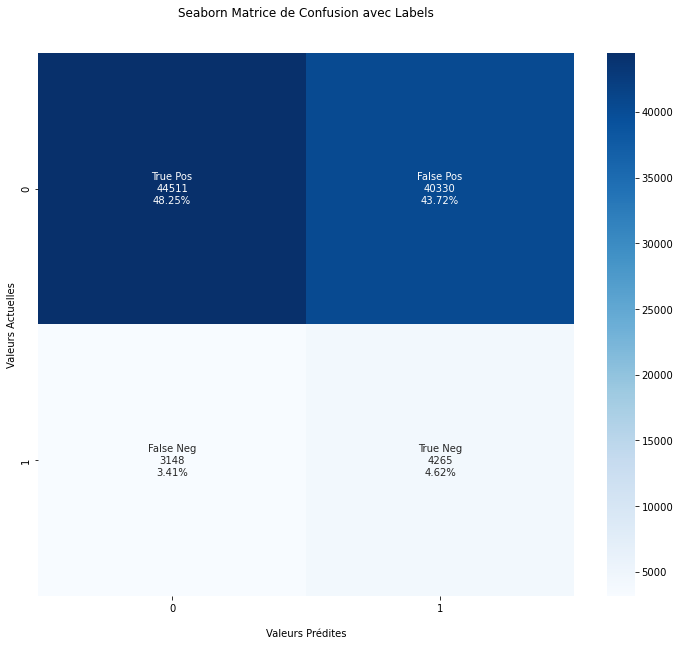

In [25]:
# Plot :

plt.figure(figsize = (12, 10))

group_names = ['True Pos','False Pos','False Neg','True Neg']

group_counts = ["{0:0.0f}".format(value) for value in
                cm1.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cm1.flatten()/np.sum(cm1)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm1, annot=labels, fmt='', cmap='Blues')

ax.set_title('Seaborn Matrice de Confusion avec Labels\n\n');
ax.set_xlabel('\nValeurs Prédites')
ax.set_ylabel('Valeurs Actuelles');

plt.show()

# Interprétations :

- Les résultats par Régression Logistique, mis sous forme de matrice de confusion, sont peu satisfaisants.
- En effet, la classification en FP et FN compte un grand nombre de données. 
- Les erreurs de Type I et de Type II sont donc élevées.
- Ce type de modélisation est donc peu recommandé.

# - RAPPORT DE CLASSIFICATION :

In [26]:
# Rapport :

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test1))

              precision    recall  f1-score   support

         0.0       0.93      0.52      0.67     84841
         1.0       0.10      0.58      0.16      7413

    accuracy                           0.53     92254
   macro avg       0.51      0.55      0.42     92254
weighted avg       0.87      0.53      0.63     92254



In [27]:
# "Classification Accuracy" :

TP = cm1[0,0]
TN = cm1[1,1]
FP = cm1[0,1]
FN = cm1[1,0]

In [28]:
# Calcul "Classification Error" :

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.4713


# Interprétations :

- L'erreur de classification est très élevée.

# - PRECISION :

La précision peut être définie comme le pourcentage de résultats positifs correctement prédits sur tous les résultats positifs prédits. 

Il peut être donné comme le rapport des vrais positifs (TP) à la somme des vrais et des faux positifs (TP + FP).

Ainsi, la précision identifie la proportion de résultats positifs correctement prédits.  Il s'intéresse plus à la classe positive qu'à la classe négative.

In [29]:
# Calcul "Precision Score" :

precision1 = TP / float(TP + FP)

print('Precision : {0:0.4f}'.format(precision1))

Precision : 0.5246


# Interprétations :

- La Précision est également très moyenne. Avec d'autres "classifiers", il serait possible de majorer cette Valeur.

# - RECALL :

Recall peut être défini comme le pourcentage de résultats positifs correctement prédits sur tous les résultats positifs réels.  

Il peut être donné comme le rapport des vrais positifs (TP) à la somme des vrais positifs et des faux négatifs (TP + FN).

In [30]:
# Calcul "Recall Score" :

recall1 = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall1))

Recall or Sensitivity : 0.9339


# Interprétations :

- Le résultat est haut, concernant le Recall. La Regression Logistique peut apporter de bons résultats, malgré la faiblesse des résultats obtenus en Négatif.

# - F1 :

Le F1-score est une métrique de classification qui mesure la capacité d'un modèle à bien prédire les individus positifs, tant en termes de precision (taux de prédictions positives correctes) qu'en termes de recall (taux de positifs correctement prédits).

In [31]:
# Importation :

from sklearn.metrics import f1_score

In [32]:
# Calcul 'weighted' :

f1_logistic_reg = f1_score(y_test, y_pred_test1, average = 'weighted')

f1_logistic_reg

0.6310561763695247

# Interprétations :

Le résultat de F1 est moyen. La Regression Logistique apporte peu de Valeur Ajoutée.

# - ROC / AUC :

Un autre outil pour mesurer visuellement les performances du modèle de classification est la courbe ROC.  

La Courbe ROC signifie courbe caractéristique de fonctionnement du récepteur.  

Une courbe ROC est un graphique qui montre les performances d'un modèle de classification à différents niveaux de seuil de classification.

La courbe ROC trace le taux de vrais positifs (TPR) par rapport au taux de faux positifs (FPR) à différents niveaux de seuil.

Le taux de vrais positifs (TPR) est également appelé rappel. Il est défini comme le rapport de TP à (TP + FN).

Le taux de faux positifs (FPR) est défini comme le rapport entre FP et (FP + TN).

Dans la courbe ROC, nous nous concentrerons sur le TPR (True Positive Rate) et le FPR (False Positive Rate) d'un seul point.  

Cela nous donnera la performance générale de la courbe ROC qui se compose du TPR et du FPR à différents niveaux de seuil.  

Ainsi, une courbe ROC trace TPR vs FPR à différents niveaux de seuil de classification.  

Si nous abaissons les niveaux de seuil, il se peut que davantage d'éléments soient classés comme positifs.  

Cela augmentera à la fois les vrais positifs (TP) et les faux positifs (FP).

In [33]:
# Importations :

from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

In [34]:
# Prédiction :

lr_probs = logreg.predict_proba(X_test)

lr_probs

array([[0.50484133, 0.49515867],
       [0.55733711, 0.44266289],
       [0.50012168, 0.49987832],
       ...,
       [0.48693983, 0.51306017],
       [0.50005965, 0.49994035],
       [0.50013257, 0.49986743]])

In [35]:
# Probabilités :

lr_probs = lr_probs[:, 1]

In [36]:
# Calcul Scores :

ns_probs = [0 for _ in range(len(y_test))]

ns_auc = roc_auc_score(y_test, ns_probs)

lr_auc1 = roc_auc_score(y_test, lr_probs)

print('No Skill: ROC AUC=%.3f' % (ns_auc))

print('Régression Logistique : ROC AUC=%.3f' % (lr_auc1))

No Skill: ROC AUC=0.500
Régression Logistique : ROC AUC=0.556


In [37]:
# Calcul ROC Courbes :

s_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)

lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

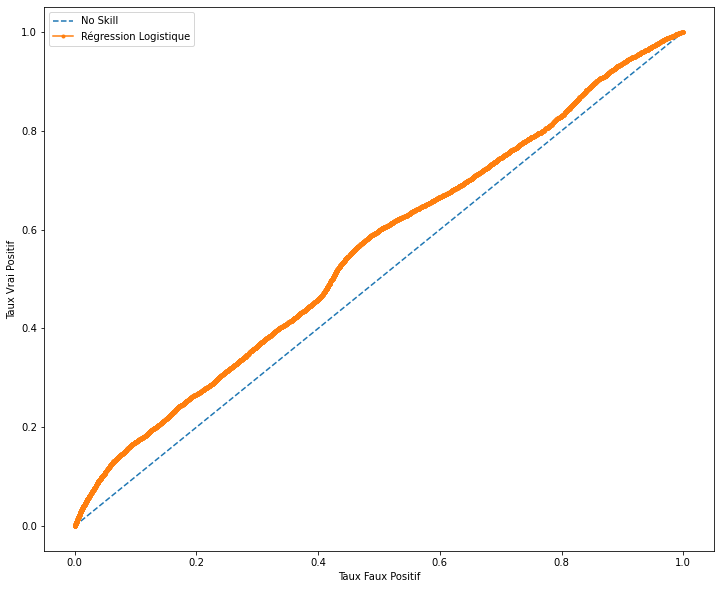

In [38]:
# Plot :

plt.figure(figsize = (12, 10))

ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Régression Logistique')

pyplot.xlabel('Taux Faux Positif')
pyplot.ylabel('Taux Vrai Positif')

pyplot.legend()

pyplot.show()

# Interprétations :

- La Courbe obtenue par Régression Logistique épouse quasiment l'approche "No Skill". Cette technique de modélisation est donc peu efficiente.

# - APPLICATION DU METRIQUE BANCAIRE :

In [39]:
# Application :

score_bancaire_log_reg = score_bancaire(y_test, y_pred_test1, fn_valeur=-2.5, fp_valeur=-1, tp_valeur=0, tn_valeur=1.5)

score_bancaire_log_reg

0.5287142020942182

# Interprétations :

- Le Gain est moyen. Cela prouve les limites de la modélisation par Regression Logistique.

# - RESULTATS :

In [40]:
# Résultats Baseline Médiane :

import math
results = results.append(pd.DataFrame({
    'Modèle' : ['Baseline Régression Logistique'],'Precision' : precision1,'Recall' : recall1,'F1' : f1_logistic_reg,
    'ROC_AUC' : lr_auc1,'Score Métier' : score_bancaire_log_reg}), ignore_index=True)

/var/folders/_5/v63wfks92ynb3p2nthszhh2m0000gn/T/ipykernel_1037/3725262039.py:4: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



# 2- LightGBM :

Light GBM est une structure rapide, appropriée, de renforcement de gradient boosting, dépendant du calcul de l’arbre de choix, utilisée pour le positionnement, la caractérisation et de nombreuses autres missions d’IA. Comme il dépend des calculs de l’arbre de choix, il divise la feuille de l’arbre la mieux adaptée tandis que d’autres calculs de renforcement divisent la profondeur de l’arbre en deux parties, l’une judicieuse et l’autre perspicace, par opposition à la feuille.

In [41]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


# - ENTRAINEMENT DU MODELE :

In [42]:
# Importation :

import lightgbm as lgbm

In [43]:
# Importation :

from lightgbm import LGBMClassifier

In [44]:
# Instanciation :

lgbm = LGBMClassifier()

In [45]:
# Sauvegarde Modèle :

filename = 'classifier_lgbm_model.sav'

pickle.dump(lgbm, open(filename, 'wb'))

In [46]:
# Fit Modèle :

lgbm.fit(X_train_oversamp, y_train_oversamp)

LGBMClassifier()

# - RESULTATS DE PREDICTION :

In [47]:
# Prédiction :

y_pred_test3 = lgbm.predict(X_test)

y_pred_test3

array([0., 0., 0., ..., 0., 0., 0.])

# - MATRICE DE CONFUSION :

In [48]:
# Matrice de Confusion :

from sklearn.metrics import confusion_matrix

cm3 = confusion_matrix(y_test, y_pred_test3)

print('Confusion matrix\n\n', cm3)

print('\nTrue Positives(TP) = ', cm3[0,0])

print('\nTrue Negatives(TN) = ', cm3[1,1])

print('\nFalse Positives(FP) = ', cm3[0,1])

print('\nFalse Negatives(FN) = ', cm3[1,0])

Confusion matrix

 [[84711   130]
 [ 7271   142]]

True Positives(TP) =  84711

True Negatives(TN) =  142

False Positives(FP) =  130

False Negatives(FN) =  7271


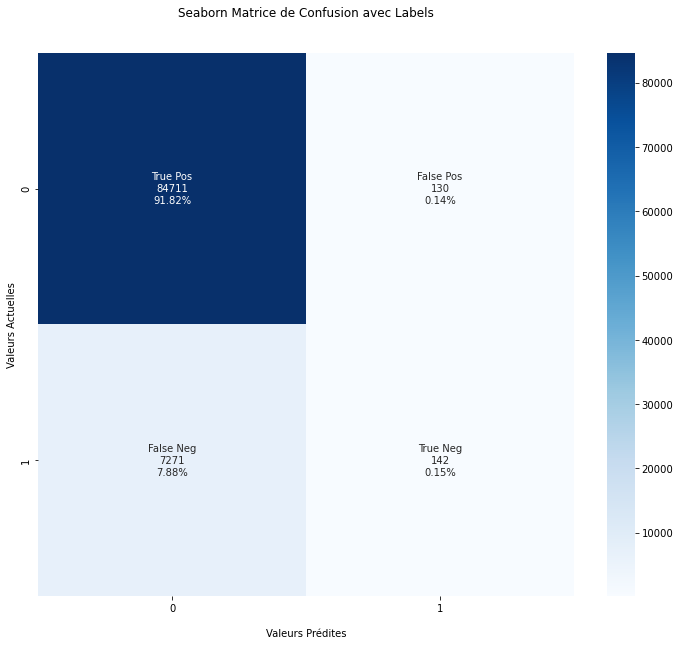

In [49]:
# Plot :

plt.figure(figsize = (12, 10))

group_names = ['True Pos','False Pos','False Neg','True Neg']

group_counts = ["{0:0.0f}".format(value) for value in
                cm3.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cm3.flatten()/np.sum(cm3)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm3, annot=labels, fmt='', cmap='Blues')

ax.set_title('Seaborn Matrice de Confusion avec Labels\n\n');
ax.set_xlabel('\nValeurs Prédites')
ax.set_ylabel('Valeurs Actuelles');

plt.show()

# Interprétations :

- La classification est quasi située en TP, toutefois, on constate un peu d'erreur de Type II.

# - RAPPORT DE CLASSIFICATION :

In [50]:
# Rapport :

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test3))

              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96     84841
         1.0       0.52      0.02      0.04      7413

    accuracy                           0.92     92254
   macro avg       0.72      0.51      0.50     92254
weighted avg       0.89      0.92      0.88     92254



In [51]:
# "Classification Accuracy" :

TP = cm3[0,0]
TN = cm3[1,1]
FP = cm3[0,1]
FN = cm3[1,0]

In [52]:
# Calcul "Classification Error" :

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.0802


# Interprétations :

- L'Erreur de Classification est très basse.

# - PRECISION :

In [53]:
# Calcul "Precision Score" :

precision3 = TP / float(TP + FP)

print('Precision : {0:0.4f}'.format(precision3))

Precision : 0.9985


# Interprétations :

- La Précision est absolue. L'approche LightGBM offre d'excellents résultats.

# - RECALL :

In [54]:
# Calcul "Recall Score" :

recall3 = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall3))

Recall or Sensitivity : 0.9210


# Interprétations :

- Le Recall est élevé. L'approche LightGBM est pertinente.

# - F1 :

In [55]:
# Importation :

from sklearn.metrics import f1_score

In [56]:
# Calcul 'macro' :

f1_lightgbm = f1_score(y_test, y_pred_test3, average = 'weighted')

f1_lightgbm

0.8841231054384405

# Interprétations :

- Le F1 est, pour ce type de modèle, encore élevé. Ce type de classification est donc efficiente.

# - ROC / AUC :

In [57]:
# Importations :

from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

In [58]:
# Prédiction :

lr_probs = lgbm.predict_proba(X_test)

lr_probs

array([[0.84357167, 0.15642833],
       [0.95519128, 0.04480872],
       [0.79528621, 0.20471379],
       ...,
       [0.96779817, 0.03220183],
       [0.97295673, 0.02704327],
       [0.94196967, 0.05803033]])

In [59]:
# Probabilités :

lr_probs = lr_probs[:, 1]

In [60]:
# Calcul Scores :

ns_probs = [0 for _ in range(len(y_test))]

ns_auc = roc_auc_score(y_test, ns_probs)

lr_auc3 = roc_auc_score(y_test, lr_probs)

print('No Skill: ROC AUC=%.3f' % (ns_auc))

print('LightGBM : ROC AUC=%.3f' % (lr_auc3))

No Skill: ROC AUC=0.500
LightGBM : ROC AUC=0.768


In [61]:
# Calcul ROC Courbes :

s_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)

lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

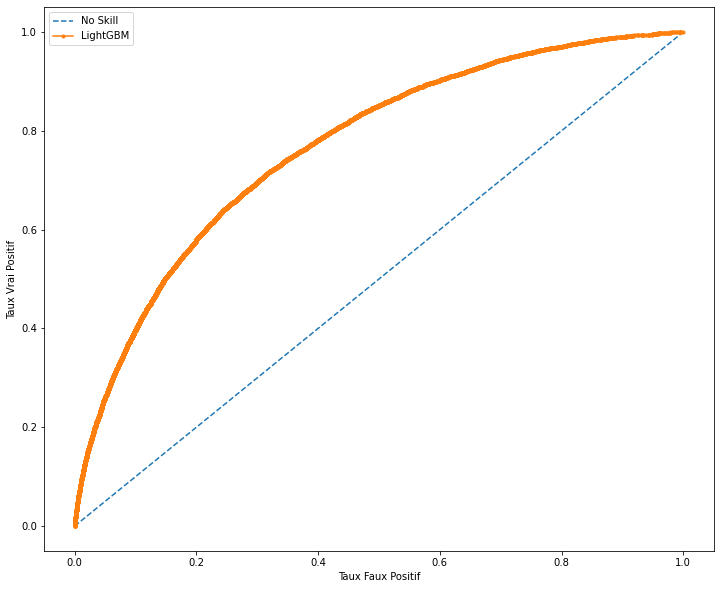

In [62]:
# Plot :

plt.figure(figsize = (12, 10))

ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='LightGBM')

pyplot.xlabel('Taux Faux Positif')
pyplot.ylabel('Taux Vrai Positif')

pyplot.legend()

pyplot.show()

# Interprétations :

- La valeur de ROC AUC est élevée, mais moins que celle obtenue par Catboost. La classification est bonne, mais perfectible. Nous influerons donc sur les hyperparamètres de ce modèle, pour majorer la valeur de l'ensemble des Métriques.

# - METRIQUE BANCAIRE :

In [63]:
# Score Bancaire :

score_bancaire_light_gbm = score_bancaire(y_test, y_pred_test3, fn_valeur=-2.5, fp_valeur=-1, tp_valeur=0, tn_valeur=1.5)

score_bancaire_light_gbm

0.9197758362781018

# Interprétations :

La valeur de Score obtenue est assez bonne.

# - FEATURE IMPORTANCE :

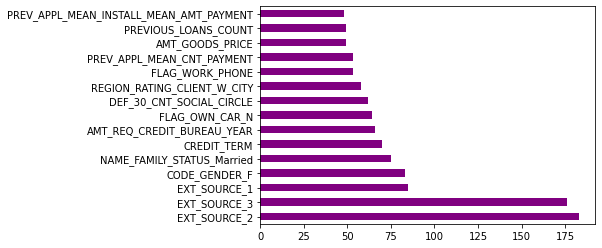

In [64]:
# Application :

feat_importances = pd.Series(lgbm.feature_importances_, index=data_train_final_feat_eng_preprocessed.columns)

feat_importances.nlargest(15).plot(kind='barh', color = 'purple')

plt.show()

# Interprétations :

Les variables pesant sur la classification sont les variables de Genre et de Sources Extérieures.

# - SHAP IMPORTANCE :

In [65]:
# Importation :

import shap

In [66]:
# Dataset :

X_importance = data_train_final_feat_eng_preprocessed

In [67]:
# Explication Modèle Prédiction :

explainer = shap.TreeExplainer(lgbm)

shap_values = explainer.shap_values(X_importance)

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


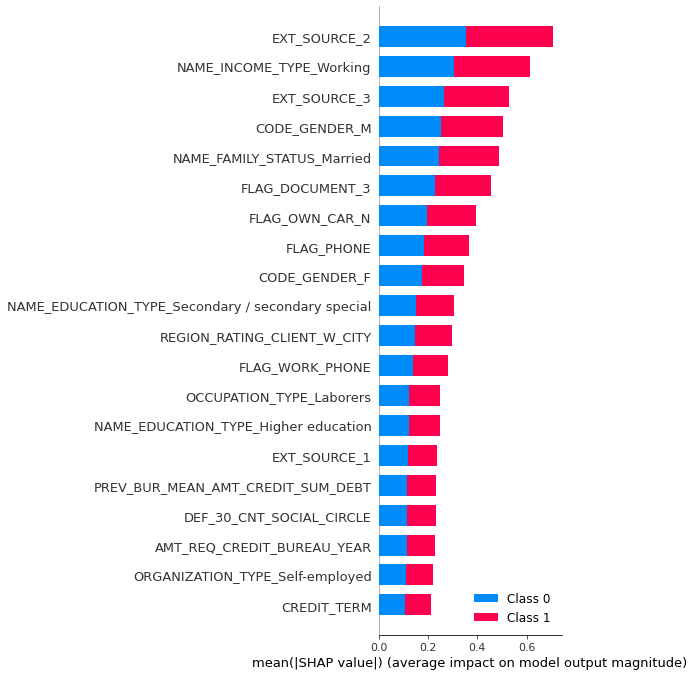

In [68]:
# Plot :

shap.summary_plot(shap_values, X_importance)

# Interprétations :

- Le type de Revenus a un impact sur l'orientation du modèle.

# - RESULTATS :

In [69]:
# Résultats LIGHTGBM :

import math
results = results.append(pd.DataFrame({
    'Modèle' : ['LightGBM'],'Precision' : precision3, 'Recall' : recall3, 'F1':f1_lightgbm,
    'ROC_AUC': lr_auc3, 'Score Métier' : score_bancaire_light_gbm}),
              ignore_index=True)

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


# 3- CATBOOST :

CatBoost est un algorithme de gradient boosting basé sur les arbres de décision.  

In [70]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


# - ENTRAINEMENT DU MODELE :

In [71]:
# Importation :

from catboost import CatBoostClassifier

In [72]:
# Instanciation :

clf = CatBoostClassifier(iterations=10, verbose=5)

In [73]:
# Sauvegarde Modèle :

filename = 'classifier_clf_model.sav'

pickle.dump(clf, open(filename, 'wb'))

In [74]:
# Fit Modèle :

clf.fit(X_train_oversamp, y_train_oversamp)

Learning rate set to 0.5
0:	learn: 0.4125795	total: 235ms	remaining: 2.11s
5:	learn: 0.1692029	total: 897ms	remaining: 598ms
9:	learn: 0.1503971	total: 1.41s	remaining: 0us


# - RESULTATS DE PREDICTION :

In [75]:
# Prédiction :

y_pred_test2 = clf.predict(X_test)

y_pred_test2

array([0., 0., 0., ..., 0., 0., 0.])

# - MATRICE DE CONFUSION :

In [76]:
# Matrice de Confusion :

from sklearn.metrics import confusion_matrix

cm2 = confusion_matrix(y_test, y_pred_test2)

print('Confusion matrix\n\n', cm2)

print('\nTrue Positives(TP) = ', cm2[0,0])

print('\nTrue Negatives(TN) = ', cm2[1,1])

print('\nFalse Positives(FP) = ', cm2[0,1])

print('\nFalse Negatives(FN) = ', cm2[1,0])

Confusion matrix

 [[84754    87]
 [ 7334    79]]

True Positives(TP) =  84754

True Negatives(TN) =  79

False Positives(FP) =  87

False Negatives(FN) =  7334


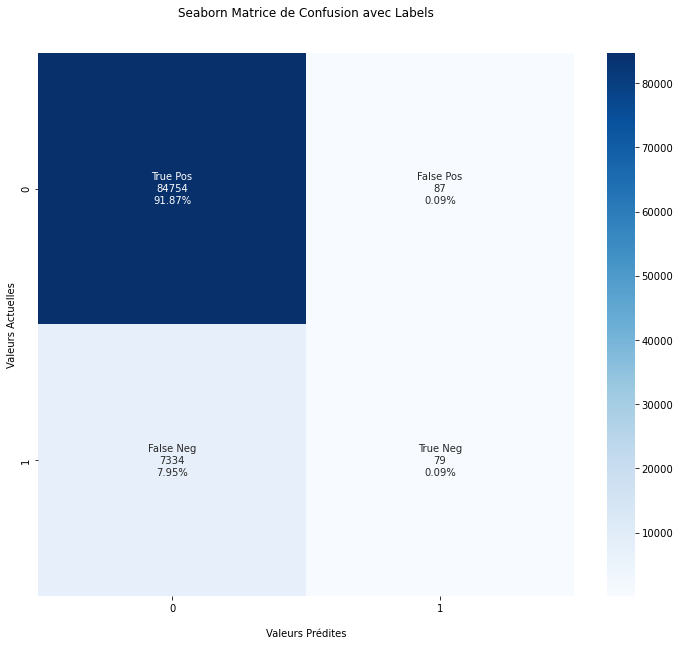

In [77]:
# Plot :

plt.figure(figsize = (12, 10))

group_names = ['True Pos','False Pos','False Neg','True Neg']

group_counts = ["{0:0.0f}".format(value) for value in
                cm2.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cm2.flatten()/np.sum(cm2)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm2, annot=labels, fmt='', cmap='Blues')

ax.set_title('Seaborn Matrice de Confusion avec Labels\n\n');
ax.set_xlabel('\nValeurs Prédites')
ax.set_ylabel('Valeurs Actuelles');

plt.show()

# Interprétations :

- La classification est bien meilleure. 
- Il y a peu de faux positifs.
- L'erreur de Type II est élevée, toutefois.

# - RAPPORT DE CLASSIFICATION :

In [78]:
# Rapport :

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test2))

              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96     84841
         1.0       0.48      0.01      0.02      7413

    accuracy                           0.92     92254
   macro avg       0.70      0.50      0.49     92254
weighted avg       0.88      0.92      0.88     92254



In [79]:
# "Classification Accuracy" :

TP = cm2[0,0]
TN = cm2[1,1]
FP = cm2[0,1]
FN = cm2[1,0]

In [80]:
# Calcul "Classification Error" :

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.0804


# Interprétations :

- L'erreur de classification est très basse. L'approche CatBoost est donc plutôt efficiente.

# - PRECISION :

In [81]:
# Calcul "Precision Score" :

precision2 = TP / float(TP + FP)

print('Precision : {0:0.4f}'.format(precision2))

Precision : 0.9990


# Interprétations :

- La Valeur de Précision est haute et confirme la qualité de cette approche.

# - RECALL :

In [82]:
# Calcul "Recall Score" :

recall2 = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall2))

Recall or Sensitivity : 0.9204


# Interprétations :

- La Valeur du Recall est excellente. L'approche Catboost est efficiente.

# - F1 :

In [83]:
# Importation :

from sklearn.metrics import f1_score

In [84]:
# Calcul 'weight' :

f1_catboost = f1_score(y_test, y_pred_test2, average = 'weighted')

f1_catboost

0.8827478615218675

# Interprétations :

- Le F1 est assez élevé. Les données sont donc correctement prédites.

# - ROC / AUC :

In [85]:
# Importations :

from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

In [86]:
# Prédiction :

lr_probs = clf.predict_proba(X_test)

lr_probs

array([[0.85295409, 0.14704591],
       [0.95726261, 0.04273739],
       [0.79243592, 0.20756408],
       ...,
       [0.9261517 , 0.0738483 ],
       [0.97190753, 0.02809247],
       [0.94329116, 0.05670884]])

In [87]:
# Probabilités :

lr_probs = lr_probs[:, 1]

In [88]:
# Calcul Scores :

ns_probs = [0 for _ in range(len(y_test))]

ns_auc = roc_auc_score(y_test, ns_probs)

lr_auc2 = roc_auc_score(y_test, lr_probs)

print('No Skill: ROC AUC=%.3f' % (ns_auc))

print('Catboost : ROC AUC=%.3f' % (lr_auc2))

No Skill: ROC AUC=0.500
Catboost : ROC AUC=0.736


In [89]:
# Calcul ROC Courbes :

s_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)

lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

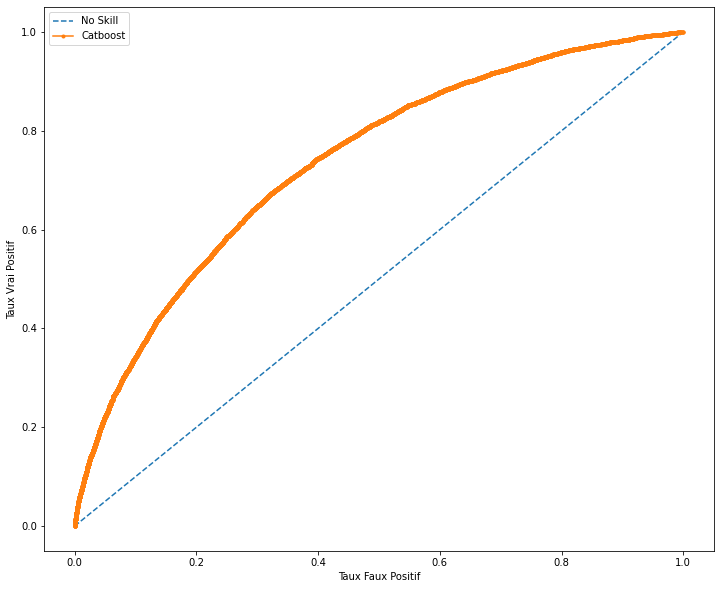

In [90]:
# Plot :

plt.figure(figsize = (12, 10))

ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Catboost')

pyplot.xlabel('Taux Faux Positif')
pyplot.ylabel('Taux Vrai Positif')

pyplot.legend()

pyplot.show()

# Interprétations :

- La Courbe ROC est très prononcée et se démarque de la Courbe No Skill. La classification par Catboost est donc assez efficace. Toutefois, la valeur de ROC AUC est perfectible.

# - APPLICATION METRIQUE BANCAIRE :

In [91]:
# Application :

score_bancaire_cat_boost = score_bancaire(y_test, y_pred_test2, fn_valeur=-2.5, fp_valeur=-1, tp_valeur=0, tn_valeur=1.5)

score_bancaire_cat_boost

0.9195590435103085

# Interprétations :

- Le score bancaire est excellent. Cette technique de modélisation garantit une certaine rentabilité.

# - FEATURE IMPORTANCE :

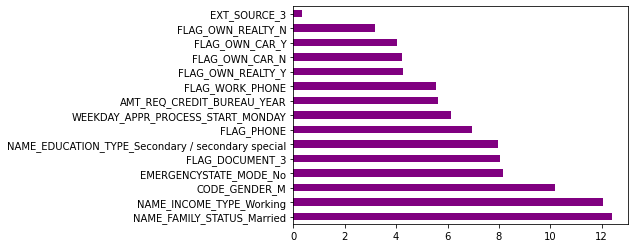

In [92]:
# Application :

feat_importances = pd.Series(clf.feature_importances_, index=data_train_final_feat_eng_preprocessed.columns)

feat_importances.nlargest(15).plot(kind='barh', color = 'purple')

plt.show()

# Interprétations :

- Les variables pesant sur la classification sont les variables de Revenus, de Statut Familial et de Genre.

# - SHAP IMPORTANCE :

In [93]:
# Importation :

import shap

In [94]:
# Dataset :

X_importance = data_train_final_feat_eng_preprocessed

In [95]:
# Explication Modèle Prédiction :

explainer = shap.TreeExplainer(clf)

shap_values = explainer.shap_values(X_importance)

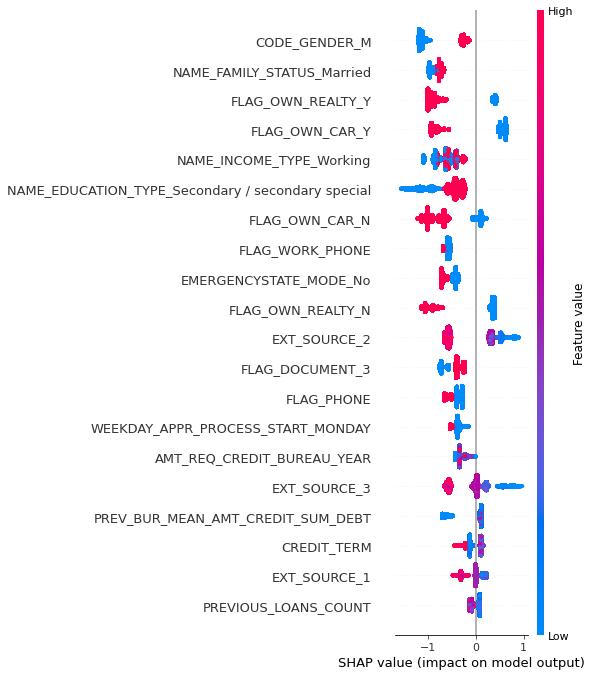

In [96]:
# Plot :

shap.summary_plot(shap_values, X_importance)

# Interprétations :

- Le Genre influe sur les Valeurs SHAP et a donc un impact sur le Comportement du Modèle.

# - RESULTATS :

In [97]:
# Résultats CATBOOST :

import math
results = results.append(pd.DataFrame({
    'Modèle' : ['CATBOOST'],'Precision' : precision2, 'Recall' : recall2, 'F1' : f1_catboost,
    'ROC_AUC': lr_auc2, 'Score Métier' : score_bancaire_cat_boost}), ignore_index=True)

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


# 4- XGBOOST :

XGBoost est une implémentation évolutive et très précise de l'amplification de gradient qui repousse les limites de la puissance de calcul pour les algorithmes d'arbres boostés, conçue en grande partie pour dynamiser les performances du modèle d'apprentissage automatique et la vitesse de calcul.

In [98]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


# - ENTRAINEMENT DU MODELE :

In [99]:
# Importation :

import xgboost as xgb

In [100]:
# Importation :

from xgboost import XGBClassifier

In [101]:
# Instanciation :

xgb = XGBClassifier(n_estimators=5)

In [102]:
# Sauvegarde Modèle :

filename = 'classifier_xgb_model.sav'

pickle.dump(xgb, open(filename, 'wb'))

In [103]:
# Fit Modèle :

xgb.fit(X_train_oversamp, y_train_oversamp)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=5, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

# - RESULTATS DE PREDICTION :

In [104]:
# Prédiction :

y_pred_test4 = xgb.predict(X_test)

y_pred_test4

array([0, 0, 0, ..., 0, 0, 0])

# - MATRICE DE CONFUSION :

In [105]:
# Matrice de Confusion :

from sklearn.metrics import confusion_matrix

cm4 = confusion_matrix(y_test, y_pred_test4)

print('Confusion matrix\n\n', cm4)

print('\nTrue Positives(TP) = ', cm4[0,0])

print('\nTrue Negatives(TN) = ', cm4[1,1])

print('\nFalse Positives(FP) = ', cm4[0,1])

print('\nFalse Negatives(FN) = ', cm4[1,0])

Confusion matrix

 [[84806    35]
 [ 7394    19]]

True Positives(TP) =  84806

True Negatives(TN) =  19

False Positives(FP) =  35

False Negatives(FN) =  7394


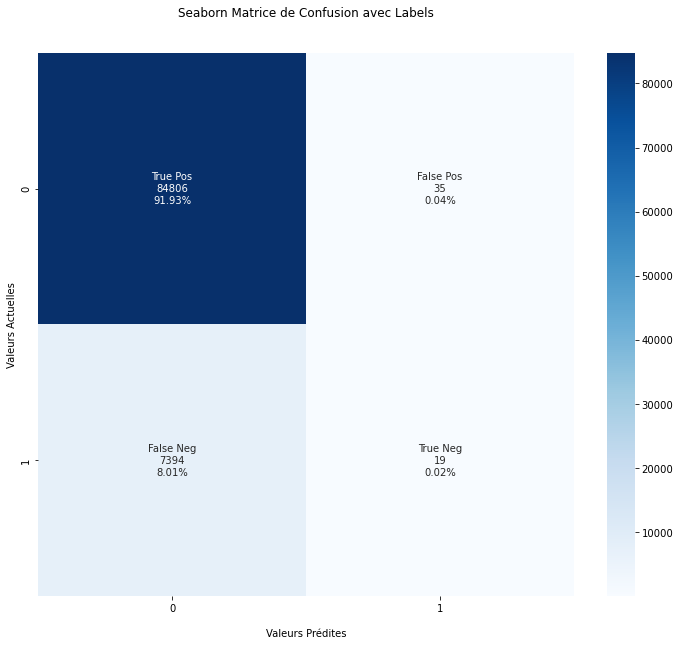

In [106]:
# Plot :

plt.figure(figsize = (12, 10))

group_names = ['True Pos','False Pos','False Neg','True Neg']

group_counts = ["{0:0.0f}".format(value) for value in
                cm4.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cm4.flatten()/np.sum(cm4)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm4, annot=labels, fmt='', cmap='Blues')

ax.set_title('Seaborn Matrice de Confusion avec Labels\n\n');
ax.set_xlabel('\nValeurs Prédites')
ax.set_ylabel('Valeurs Actuelles');

plt.show()

# Interprétations :

- La Classification est quasiment constituée de TP. Il y a très peu d'erreurs de Type II.

# - RAPPORT DE CLASSIFICATION :

In [107]:
# Rapport :

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test4))

              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96     84841
         1.0       0.35      0.00      0.01      7413

    accuracy                           0.92     92254
   macro avg       0.64      0.50      0.48     92254
weighted avg       0.87      0.92      0.88     92254



In [108]:
# "Classification Accuracy" :

TP = cm4[0,0]
TN = cm4[1,1]
FP = cm4[0,1]
FN = cm4[1,0]

In [109]:
# Calcul "Classification Error" :

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.0805


# Interprétations :

- L'Erreur de Classification est très basse. L'approche XGBOOST apporte de bons résultats.

# - PRECISION :

In [110]:
# Calcul "Precision Score" :

precision4 = TP / float(TP + FP)

print('Precision : {0:0.4f}'.format(precision4))

Precision : 0.9996


# Interprétations :

- La Valeur de Précision est optimale.

# - RECALL :

In [111]:
# Calcul "Recall Score" :

recall4 = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall4))

Recall or Sensitivity : 0.9198


# Interprétations :

- Le Recall est également très bon. La Modélisation XGBOOST apporte les Meilleurs Résultats.

# - F1 :

In [112]:
# Importation :

from sklearn.metrics import f1_score

In [113]:
# Calcul 'weighted' :

f1_xgboost = f1_score(y_test, y_pred_test4, average = 'weighted')

f1_xgboost

0.8814644837660525

# Interprétations :

- La Valeur de F1 est moins élevée pour la modélisation XGBOOST, que pour les autres modélisations.

# - ROC / AUC :

In [114]:
# Importations :

from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

In [115]:
# Prédiction :

lr_probs = xgb.predict_proba(X_test)

lr_probs

array([[0.73778534, 0.26221463],
       [0.80143154, 0.19856846],
       [0.59557235, 0.40442768],
       ...,
       [0.726002  , 0.273998  ],
       [0.81704426, 0.18295577],
       [0.7678248 , 0.23217517]], dtype=float32)

In [116]:
# Probabilités :

lr_probs = lr_probs[:, 1]

In [117]:
# Calcul Scores :

ns_probs = [0 for _ in range(len(y_test))]

ns_auc = roc_auc_score(y_test, ns_probs)

lr_auc4 = roc_auc_score(y_test, lr_probs)

print('No Skill: ROC AUC=%.3f' % (ns_auc))

print('XGBOOST : ROC AUC=%.3f' % (lr_auc4))

No Skill: ROC AUC=0.500
XGBOOST : ROC AUC=0.691


In [118]:
# Calcul ROC Courbes :

s_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)

lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

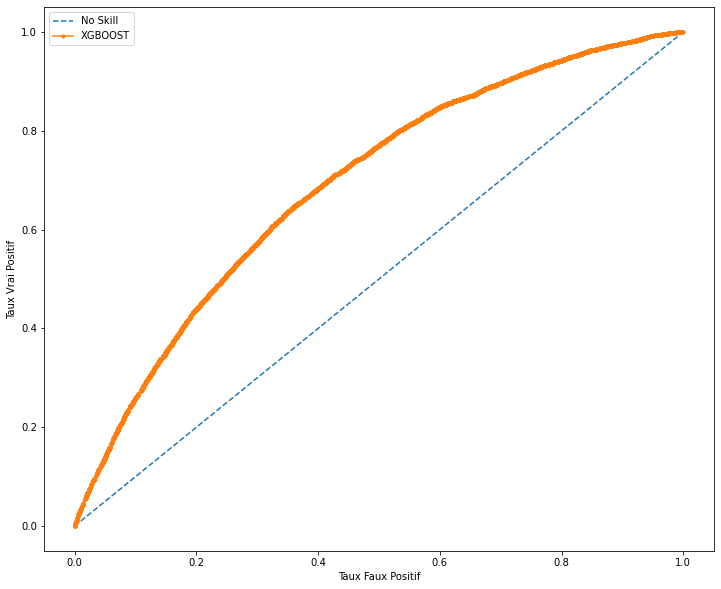

In [119]:
# Plot :

plt.figure(figsize = (12, 10))

ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='XGBOOST')

pyplot.xlabel('Taux Faux Positif')
pyplot.ylabel('Taux Vrai Positif')

pyplot.legend()

pyplot.show()

# Interprétations :

- Le ROC AUC est élevé et dépasse largement le No Skill. Le XGBOOST offre des résultats significatifs.

# - APPLICATION DU METRIQUE BANCAIRE :

In [120]:
# Application :

score_bancaire_xgb = score_bancaire(y_test, y_pred_test4, fn_valeur=-2.5, fp_valeur=-1, tp_valeur=0, tn_valeur=1.5)

score_bancaire_xgb

0.9194723264031912

# Interprétations :

- Le Score Bancaire est satisfaisant. La modélisation par XGBOOST est donc appropriée.

# - FEATURE IMPORTANCE :

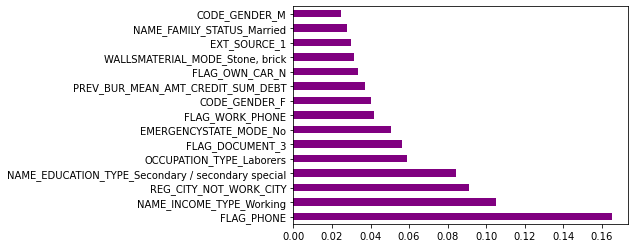

In [121]:
# Application :

feat_importances = pd.Series(xgb.feature_importances_, index=data_train_final_feat_eng_preprocessed.columns)

feat_importances.nlargest(15).plot(kind='barh', color = 'purple')

plt.show()

# Interprétations :

Les variables pesant sur la classification sont les variables de Revenus, "FLAG PHONE" et d'Education.

# - SHAP IMPORTANCE :

In [122]:
# Importation :

import shap

In [123]:
# Dataset :

X_importance = data_train_final_feat_eng_preprocessed

In [124]:
# Explication Modèle Prédiction :

explainer = shap.TreeExplainer(xgb)

shap_values = explainer.shap_values(X_importance)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


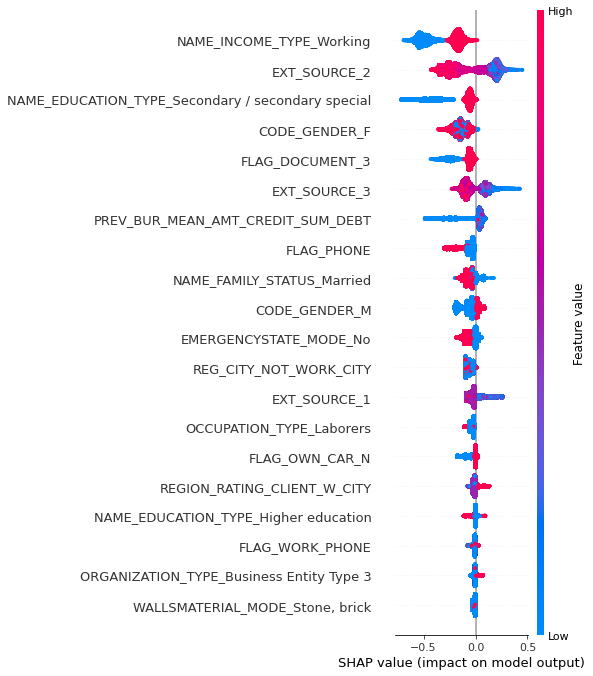

In [125]:
# Plot :

shap.summary_plot(shap_values, X_importance)

# Interprétations :

- La Valeur SHAP de la Variable Revenu a le plus d'impact sur l'orientation du Modèle.

# - RESULTATS :

In [126]:
import math
results = results.append(pd.DataFrame({
    'Modèle' : ['XGBOOST'],'Precision' : precision4, 'Recall' : recall4, 'F1':f1_xgboost,
    'ROC_AUC': lr_auc4, 'Score Métier' : score_bancaire_xgb}), ignore_index=True)

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


# 5- CONCLUSION :

In [127]:
# Présentation des Résultats :

results

,Modèle,Precision,Recall,F1,ROC_AUC,Score Métier
0,Baseline Régression Logistique,0.524640,0.933947,0.631056,0.556189,0.528714
1,LightGBM,0.998468,0.920952,0.884123,0.767567,0.919776
2,CATBOOST,0.998975,0.920359,0.882748,0.735671,0.919559
3,XGBOOST,0.999587,0.919805,0.881464,0.691291,0.919472


# Interprétations :

- La Modélisation par LightGBM apporte les meilleurs scores. En revanche, celle par XGBOOST apporte les moins bons résultats de toutes nos approches. J'opte donc pour une optimisation des Hyperparamètres du Modèle XGBOOST.

# C- FONCTION DE COÛT :

# - LIGHTGBM :

In [128]:
# Fonction "Coût" LIGHTGBM :

def cost_false(lgbm, y_test, X_test):
    cm = confusion_matrix(y_test, lgbm.predict(X_test))
    FP = cm[0][1]/np.sum(cm)
    FN = cm[1][0]/np.sum(cm)
  
    print("False Pos: {0:.2%}".format(FP))
    print("False Neg: {0:.2%}".format(FN))
    return FP, FN

In [129]:
# Application :

cost_false(lgbm, y_test, X_test)

False Pos: 0.14%
False Neg: 7.88%


(0.0014091529906562316, 0.078815010731242)

# Interprétations :

- La fonction de Coût indique que nos résultats sont assez justes, le taux d'erreur pour le FP est nul. Mais un peu élévé, concernant les FN, 9%.

# - CATBOOST :

In [130]:
# Fonction "Coût" CATBOOST :

def cost_false(clf, y_test, X_test):
    cm = confusion_matrix(y_test, clf.predict(X_test))
    FP = cm[0][1]/np.sum(cm)
    FN = cm[1][0]/np.sum(cm)
  
    print("False Pos: {0:.2%}".format(FP))
    print("False Neg: {0:.2%}".format(FN))
    return FP, FN

In [131]:
# Application :

cost_false(clf, y_test, X_test)

False Pos: 0.09%
False Neg: 7.95%


(0.0009430485399007089, 0.0794979079497908)

# Interprétations :

- La fonction de Coût indique que nos résultats sont assez justes, le taux d'erreur pour le FP est quasi nul.

# - XGBOOST :

In [132]:
# Fonction "Coût" XGBOOST :

def cost_false(xgb, y_test, X_test):
    cm = confusion_matrix(y_test, xgb.predict(X_test))
    FP = cm[0][1]/np.sum(cm)
    FN = cm[1][0]/np.sum(cm)
  
    print("False Pos: {0:.2%}".format(FP))
    print("False Neg: {0:.2%}".format(FN))
    return FP, FN

In [133]:
# Application :

cost_false(xgb, y_test, X_test)

False Pos: 0.04%
False Neg: 8.01%


(0.0003793873436382162, 0.0801482862531706)

# Interprétations :

- Les résultats des Erreurs obtenues par la Fonction de Coût sont quasi identiques à ceux obtenus par LightGBM.

# D- CROSS VALIDATION : XGBOOST :

Parmi tous les modèles, j'opte pour une approche par Cross Validation de XGBOOST. 

In [134]:
# Importations :

from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import xgboost as xgb

In [135]:
# Modélisation et Split KFOLD :

model = xgb.XGBClassifier()
kfold = KFold(n_splits=10, random_state=None)
accuracies = cross_val_score(estimator = model, X = X_train_oversamp, y = y_train_oversamp, cv = kfold)
print("Accuracy: %.2f%% (%.2f%%)" % (accuracies.mean()*100, accuracies.std()*100))

Accuracy: 95.53% (3.85%)


# Interprétations :

- Par Cross Validation, avec un nombre de 10 Folds, on atteint un score d'Accuracy de 96%. Ce qui est prometteur.

# E- RECHERCHE ET OPTIMISATION DES HYPERPARAMETRES PAR HYPEROPT : XGBOOST :

Parmi tous les modèles, j'opte pour une hyperparamétrisation de XGBOOST, via HYPEROPT. En effet, le résultat précedemment obtenu est perfectible.

In [136]:
pip install hyperopt

Note: you may need to restart the kernel to use updated packages.


# - XGBOOST :

In [137]:
# Importation :

from hyperopt import STATUS_OK, Trials, fmin, hp, tpe

In [138]:
from sklearn.metrics import average_precision_score

In [139]:
# Paramètres :

space={'max_depth': hp.quniform("max_depth", 3, 18, 1),
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': 180,
        'seed': 0
    }

In [140]:
# Fonction Hyperparamètres :

def objective(space):

    xgboost = XGBClassifier(
                    n_estimators =space['n_estimators'], max_depth = int(space['max_depth']), gamma = space['gamma'],
                    reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
                    colsample_bytree=int(space['colsample_bytree']))
    
    evaluation = [(X_train_oversamp, y_train_oversamp), (X_test, y_test)]
    
    xgboost.fit(X_train_oversamp, y_train_oversamp,
            eval_set=evaluation, eval_metric="auc",
            early_stopping_rounds=10,verbose=False)
    

    pred = xgboost.predict(X_test)
    accuracy = accuracy_score(y_test, pred > 0.5)

    print ("SCORE ACCURACY :", accuracy)

    return {'loss': -accuracy, 'status': STATUS_OK }

In [141]:
# Essais :

trials = Trials()

In [142]:
# Recherche des Meilleurs Paramètres :

best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials)

  0%|          | 0/100 [00:00<?, ?trial/s, best loss=?]

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



SCORE ACCURACY :                                       
0.9142801396145425                                     
  1%|          | 1/100 [00:19<32:01, 19.41s/trial, best loss: -0.9142801396145425]

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



SCORE ACCURACY :                                                                  
0.9166106618683201                                                                
  2%|▏         | 2/100 [00:39<32:07, 19.66s/trial, best loss: -0.9166106618683201]

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



SCORE ACCURACY :                                                                  
0.9162637934398509                                                                
  3%|▎         | 3/100 [00:54<28:52, 17.86s/trial, best loss: -0.9166106618683201]

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



SCORE ACCURACY :                                                                  
0.9043510308496109                                                                
  4%|▍         | 4/100 [01:04<23:34, 14.74s/trial, best loss: -0.9166106618683201]

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



SCORE ACCURACY :                                                                  
0.9143560170832701                                                                
  5%|▌         | 5/100 [01:19<23:21, 14.75s/trial, best loss: -0.9166106618683201]

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



SCORE ACCURACY :                                                                  
0.9161770763327335                                                                
  6%|▌         | 6/100 [01:35<23:55, 15.27s/trial, best loss: -0.9166106618683201]

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



SCORE ACCURACY :                                                                  
0.9145186116591151                                                                
  7%|▋         | 7/100 [01:50<23:04, 14.89s/trial, best loss: -0.9166106618683201]

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



SCORE ACCURACY :                                                                  
0.9163288312701888                                                                
  8%|▊         | 8/100 [02:05<23:17, 15.19s/trial, best loss: -0.9166106618683201]

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



SCORE ACCURACY :                                                                  
0.9164480672924751                                                                
  9%|▉         | 9/100 [02:30<27:39, 18.23s/trial, best loss: -0.9166106618683201]

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



SCORE ACCURACY :                                                                  
0.9026166887072647                                                                
 10%|█         | 10/100 [02:41<23:57, 15.97s/trial, best loss: -0.9166106618683201]

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



SCORE ACCURACY :                                                                   
0.9162312745246819                                                                 
 11%|█         | 11/100 [02:56<23:21, 15.75s/trial, best loss: -0.9166106618683201]

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



SCORE ACCURACY :                                                                   
0.9165456240379821                                                                 
 12%|█▏        | 12/100 [03:12<23:01, 15.70s/trial, best loss: -0.9166106618683201]

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



SCORE ACCURACY :                                                                   
0.9192880525505669                                                                 
 13%|█▎        | 13/100 [03:40<28:18, 19.53s/trial, best loss: -0.9192880525505669]

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



SCORE ACCURACY :                                                                   
0.9032453877338652                                                                 
 14%|█▍        | 14/100 [03:50<23:52, 16.66s/trial, best loss: -0.9192880525505669]

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



SCORE ACCURACY :                                                                   
0.9143885359984391                                                                 
 15%|█▌        | 15/100 [04:05<22:52, 16.14s/trial, best loss: -0.9192880525505669]

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



SCORE ACCURACY :                                                                   
0.9192880525505669                                                                 
 16%|█▌        | 16/100 [04:43<31:39, 22.62s/trial, best loss: -0.9192880525505669]

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



SCORE ACCURACY :                                                                   
0.9028876796670063                                                                 
 17%|█▋        | 17/100 [04:55<26:54, 19.45s/trial, best loss: -0.9192880525505669]

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



SCORE ACCURACY :                                                                   
0.9094781798079216                                                                 
 18%|█▊        | 18/100 [05:10<24:33, 17.97s/trial, best loss: -0.9192880525505669]

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



SCORE ACCURACY :                                                                   
0.9162637934398509                                                                 
 19%|█▉        | 19/100 [05:28<24:14, 17.96s/trial, best loss: -0.9192880525505669]

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



SCORE ACCURACY :                                                                   
0.8937390248661304                                                                 
 20%|██        | 20/100 [05:40<21:42, 16.28s/trial, best loss: -0.9192880525505669]

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



SCORE ACCURACY :                                                                   
0.9192338543586186                                                                 
 21%|██        | 21/100 [06:10<26:41, 20.27s/trial, best loss: -0.9192880525505669]

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



SCORE ACCURACY :                                                                   
0.9192772129121772                                                                 
 22%|██▏       | 22/100 [06:45<32:27, 24.96s/trial, best loss: -0.9192880525505669]

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



SCORE ACCURACY :                                                                   
0.8935547510135062                                                                 
 23%|██▎       | 23/100 [06:55<26:16, 20.47s/trial, best loss: -0.9192880525505669]

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



SCORE ACCURACY :                                                                   
0.9192230147202289                                                                 
 24%|██▍       | 24/100 [07:23<28:44, 22.70s/trial, best loss: -0.9192880525505669]

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



SCORE ACCURACY :                                                                   
0.9192446939970083                                                                 
 25%|██▌       | 25/100 [07:51<30:14, 24.19s/trial, best loss: -0.9192880525505669]

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



SCORE ACCURACY :                                                                   
0.896264660610922                                                                  
 26%|██▌       | 26/100 [08:01<24:35, 19.95s/trial, best loss: -0.9192880525505669]

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



SCORE ACCURACY :                                                                   
0.9152557070696121                                                                 
 27%|██▋       | 27/100 [08:17<22:46, 18.72s/trial, best loss: -0.9192880525505669]

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



SCORE ACCURACY :                                                                   
0.9192230147202289                                                                 
 28%|██▊       | 28/100 [08:51<28:03, 23.38s/trial, best loss: -0.9192880525505669]

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



SCORE ACCURACY :                                                                   
0.9193097318273462                                                                 
 29%|██▉       | 29/100 [09:19<29:23, 24.83s/trial, best loss: -0.9193097318273462]

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



SCORE ACCURACY :                                                                   
0.9193314111041255                                                                 
 30%|███       | 30/100 [09:48<30:08, 25.84s/trial, best loss: -0.9193314111041255]

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



SCORE ACCURACY :                                                                   
0.9193639300192945                                                                 
 31%|███       | 31/100 [10:16<30:29, 26.52s/trial, best loss: -0.9193639300192945]

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



SCORE ACCURACY :                                                                   
0.9161879159711233                                                                 
 32%|███▏      | 32/100 [10:34<27:18, 24.09s/trial, best loss: -0.9193639300192945]

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



SCORE ACCURACY :                                                                   
0.9192988921889566                                                                 
 33%|███▎      | 33/100 [11:05<29:07, 26.08s/trial, best loss: -0.9193639300192945]

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



SCORE ACCURACY :                                                                   
0.9161879159711233                                                                 
 34%|███▍      | 34/100 [11:21<25:16, 22.98s/trial, best loss: -0.9193639300192945]

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



SCORE ACCURACY :                                                                   
0.9011966960782188                                                                 
 35%|███▌      | 35/100 [11:31<20:40, 19.09s/trial, best loss: -0.9193639300192945]

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



SCORE ACCURACY :                                                                   
0.9163179916317992                                                                 
 36%|███▌      | 36/100 [11:46<19:18, 18.10s/trial, best loss: -0.9193639300192945]

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



SCORE ACCURACY :                                                                   
0.9145186116591151                                                                 
 37%|███▋      | 37/100 [12:02<18:06, 17.24s/trial, best loss: -0.9193639300192945]

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



SCORE ACCURACY :                                                                   
0.9193097318273462                                                                 
 38%|███▊      | 38/100 [12:31<21:27, 20.76s/trial, best loss: -0.9193639300192945]

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



SCORE ACCURACY :                                                                   
0.9193530903809048                                                                 
 39%|███▉      | 39/100 [13:08<26:05, 25.67s/trial, best loss: -0.9193639300192945]

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



SCORE ACCURACY :                                                                   
0.9164047087389164                                                                 
 40%|████      | 40/100 [13:24<22:57, 22.97s/trial, best loss: -0.9193639300192945]

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



SCORE ACCURACY :                                                                   
0.9162421141630716                                                                 
 41%|████      | 41/100 [13:41<20:46, 21.12s/trial, best loss: -0.9193639300192945]

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



SCORE ACCURACY :                                                                   
0.9161770763327335                                                                 
 42%|████▏     | 42/100 [13:59<19:28, 20.14s/trial, best loss: -0.9193639300192945]

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



SCORE ACCURACY :                                                                   
0.9161879159711233                                                                 
 43%|████▎     | 43/100 [14:18<18:42, 19.69s/trial, best loss: -0.9193639300192945]

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



SCORE ACCURACY :                                                                   
0.9160795195872266                                                                 
 44%|████▍     | 44/100 [14:36<17:52, 19.15s/trial, best loss: -0.9193639300192945]

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



SCORE ACCURACY :                                                                   
0.902931038220565                                                                  
 45%|████▌     | 45/100 [14:48<15:47, 17.23s/trial, best loss: -0.9193639300192945]

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



SCORE ACCURACY :                                                                   
0.9046111821709628                                                                 
 46%|████▌     | 46/100 [15:00<13:57, 15.51s/trial, best loss: -0.9193639300192945]

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



SCORE ACCURACY :                                                                   
0.9163071519934095                                                                 
 47%|████▋     | 47/100 [15:15<13:40, 15.47s/trial, best loss: -0.9193639300192945]

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



SCORE ACCURACY :                                                                   
0.9193314111041255                                                                 
 48%|████▊     | 48/100 [15:43<16:34, 19.13s/trial, best loss: -0.9193639300192945]

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



SCORE ACCURACY :                                                                   
0.9164480672924751                                                                 
 49%|████▉     | 49/100 [15:58<15:19, 18.03s/trial, best loss: -0.9193639300192945]

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



SCORE ACCURACY :                                                                   
0.8956468012227112                                                                 
 50%|█████     | 50/100 [16:08<12:52, 15.45s/trial, best loss: -0.9193639300192945]

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



SCORE ACCURACY :                                                                   
0.9192988921889566                                                                 
 51%|█████     | 51/100 [16:36<15:52, 19.44s/trial, best loss: -0.9193639300192945]

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



SCORE ACCURACY :                                                                   
0.9192230147202289                                                                 
 52%|█████▏    | 52/100 [17:11<19:08, 23.93s/trial, best loss: -0.9193639300192945]

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



SCORE ACCURACY :                                                                   
0.9160795195872266                                                                 
 53%|█████▎    | 53/100 [17:26<16:45, 21.38s/trial, best loss: -0.9193639300192945]

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



SCORE ACCURACY :                                                                   
0.9193747696576842                                                                 
 54%|█████▍    | 54/100 [17:55<18:05, 23.59s/trial, best loss: -0.9193747696576842]

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



SCORE ACCURACY :                                                                   
0.8967307650616776                                                                 
 55%|█████▌    | 55/100 [18:05<14:40, 19.56s/trial, best loss: -0.9193747696576842]

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



SCORE ACCURACY :                                                                   
0.9146920458733496                                                                 
 56%|█████▌    | 56/100 [18:21<13:35, 18.53s/trial, best loss: -0.9193747696576842]

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



SCORE ACCURACY :                                                                   
0.8911266720142216                                                                 
 57%|█████▋    | 57/100 [18:31<11:27, 16.00s/trial, best loss: -0.9193747696576842]

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



SCORE ACCURACY :                                                                   
0.9164047087389164                                                                 
 58%|█████▊    | 58/100 [18:53<12:22, 17.67s/trial, best loss: -0.9193747696576842]

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



SCORE ACCURACY :                                                                   
0.916643180783489                                                                  
 59%|█████▉    | 59/100 [19:10<11:54, 17.43s/trial, best loss: -0.9193747696576842]

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



SCORE ACCURACY :                                                                   
0.8936631473974028                                                                 
 60%|██████    | 60/100 [19:19<10:02, 15.07s/trial, best loss: -0.9193747696576842]

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



SCORE ACCURACY :                                                                   
0.9160686799488369                                                                 
 61%|██████    | 61/100 [19:35<09:54, 15.26s/trial, best loss: -0.9193747696576842]

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



SCORE ACCURACY :                                                                   
0.915743490797147                                                                  
 62%|██████▏   | 62/100 [19:50<09:39, 15.24s/trial, best loss: -0.9193747696576842]

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



SCORE ACCURACY :                                                                   
0.9032562273722549                                                                 
 63%|██████▎   | 63/100 [20:00<08:24, 13.64s/trial, best loss: -0.9193747696576842]

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



SCORE ACCURACY :                                                                   
0.9193530903809048                                                                 
 64%|██████▍   | 64/100 [20:30<11:01, 18.36s/trial, best loss: -0.9193747696576842]

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



SCORE ACCURACY :                                                                   
0.9145944891278427                                                                 
 65%|██████▌   | 65/100 [20:49<10:52, 18.65s/trial, best loss: -0.9193747696576842]

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



SCORE ACCURACY :                                                                   
0.9192988921889566                                                                 
 66%|██████▌   | 66/100 [21:24<13:17, 23.47s/trial, best loss: -0.9193747696576842]

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



SCORE ACCURACY :                                                                   
0.9193530903809048                                                                 
 67%|██████▋   | 67/100 [21:56<14:18, 26.03s/trial, best loss: -0.9193747696576842]

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



SCORE ACCURACY :                                                                   
0.9192446939970083                                                                 
 68%|██████▊   | 68/100 [22:25<14:20, 26.89s/trial, best loss: -0.9193747696576842]

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



SCORE ACCURACY :                                                                   
0.9192555336353979                                                                 
 69%|██████▉   | 69/100 [22:53<14:10, 27.42s/trial, best loss: -0.9193747696576842]

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



SCORE ACCURACY :                                                                   
0.9192446939970083                                                                 
 70%|███████   | 70/100 [23:28<14:46, 29.54s/trial, best loss: -0.9193747696576842]

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



SCORE ACCURACY :                                                                   
0.9192988921889566                                                                 
 71%|███████   | 71/100 [23:56<14:05, 29.15s/trial, best loss: -0.9193747696576842]

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



SCORE ACCURACY :                                                                   
0.9192013354434496                                                                 
 72%|███████▏  | 72/100 [24:25<13:32, 29.00s/trial, best loss: -0.9193747696576842]

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



SCORE ACCURACY :                                                                   
0.9193856092960739                                                                 
 73%|███████▎  | 73/100 [24:53<12:58, 28.83s/trial, best loss: -0.9193856092960739]

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



SCORE ACCURACY :                                                                   
0.9162529538014612                                                                 
 74%|███████▍  | 74/100 [25:15<11:39, 26.91s/trial, best loss: -0.9193856092960739]

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



SCORE ACCURACY :                                                                   
0.9163288312701888                                                                 
 75%|███████▌  | 75/100 [25:31<09:46, 23.44s/trial, best loss: -0.9193856092960739]

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



SCORE ACCURACY :                                                                   
0.9192880525505669                                                                 
 76%|███████▌  | 76/100 [25:59<09:55, 24.81s/trial, best loss: -0.9193856092960739]

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



SCORE ACCURACY :                                                                   
0.915906085372992                                                                  
 77%|███████▋  | 77/100 [26:15<08:30, 22.18s/trial, best loss: -0.9193856092960739]

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



SCORE ACCURACY :                                                                   
0.8965139722938843                                                                 
 78%|███████▊  | 78/100 [26:24<06:45, 18.41s/trial, best loss: -0.9193856092960739]

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



SCORE ACCURACY :                                                                   
0.9166540204218787                                                                 
 79%|███████▉  | 79/100 [26:41<06:13, 17.79s/trial, best loss: -0.9193856092960739]

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



SCORE ACCURACY :                                                                   
0.9192772129121772                                                                 
 80%|████████  | 80/100 [27:22<08:17, 24.89s/trial, best loss: -0.9193856092960739]

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



SCORE ACCURACY :                                                                   
0.9164047087389164                                                                 
 81%|████████  | 81/100 [27:39<07:04, 22.35s/trial, best loss: -0.9193856092960739]

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



SCORE ACCURACY :                                                                   
0.9192446939970083                                                                 
 82%|████████▏ | 82/100 [28:08<07:19, 24.43s/trial, best loss: -0.9193856092960739]

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



SCORE ACCURACY :                                                                   
0.9192555336353979                                                                 
 83%|████████▎ | 83/100 [28:40<07:34, 26.76s/trial, best loss: -0.9193856092960739]

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



SCORE ACCURACY :                                                                   
0.9164589069308647                                                                 
 84%|████████▍ | 84/100 [28:57<06:22, 23.90s/trial, best loss: -0.9193856092960739]

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



SCORE ACCURACY :                                                                   
0.9039716435059726                                                                 
 85%|████████▌ | 85/100 [29:20<05:52, 23.47s/trial, best loss: -0.9193856092960739]

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



SCORE ACCURACY :                                                                   
0.9019771500422746                                                                 
 86%|████████▌ | 86/100 [29:32<04:39, 20.00s/trial, best loss: -0.9193856092960739]

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



SCORE ACCURACY :                                                                   
0.9165564636763718                                                                 
 87%|████████▋ | 87/100 [29:53<04:23, 20.30s/trial, best loss: -0.9193856092960739]

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



SCORE ACCURACY :                                                                   
0.9193205714657359                                                                 
 88%|████████▊ | 88/100 [30:24<04:42, 23.56s/trial, best loss: -0.9193856092960739]

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



SCORE ACCURACY :                                                                   
0.8936197888438442                                                                 
 89%|████████▉ | 89/100 [30:35<03:38, 19.89s/trial, best loss: -0.9193856092960739]

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



SCORE ACCURACY :                                                                   
0.9161120385023955                                                                 
 90%|█████████ | 90/100 [30:52<03:10, 19.01s/trial, best loss: -0.9193856092960739]

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



SCORE ACCURACY :                                                                   
0.9165022654844235                                                                 
 91%|█████████ | 91/100 [31:16<03:03, 20.35s/trial, best loss: -0.9193856092960739]

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



SCORE ACCURACY :                                                                   
0.9163613501853578                                                                 
 92%|█████████▏| 92/100 [31:32<02:33, 19.14s/trial, best loss: -0.9193856092960739]

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



SCORE ACCURACY :                                                                   
0.9166540204218787                                                                 
 93%|█████████▎| 93/100 [31:48<02:06, 18.05s/trial, best loss: -0.9193856092960739]

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



SCORE ACCURACY :                                                                   
0.9192121750818393                                                                 
 94%|█████████▍| 94/100 [32:15<02:05, 20.87s/trial, best loss: -0.9193856092960739]

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



SCORE ACCURACY :                                                                   
0.9165998222299304                                                                 
 95%|█████████▌| 95/100 [32:30<01:36, 19.23s/trial, best loss: -0.9193856092960739]

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



SCORE ACCURACY :                                                                   
0.9193530903809048                                                                 
 96%|█████████▌| 96/100 [32:59<01:27, 21.90s/trial, best loss: -0.9193856092960739]

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



SCORE ACCURACY :                                                                   
0.9017820365512607                                                                 
 97%|█████████▋| 97/100 [33:17<01:02, 20.98s/trial, best loss: -0.9193856092960739]

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



SCORE ACCURACY :                                                                   
0.8955926030307629                                                                 
 98%|█████████▊| 98/100 [33:28<00:35, 17.82s/trial, best loss: -0.9193856092960739]

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



SCORE ACCURACY :                                                                   
0.9163830294621371                                                                 
 99%|█████████▉| 99/100 [33:44<00:17, 17.46s/trial, best loss: -0.9193856092960739]

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



SCORE ACCURACY :                                                                   
0.8902595009430485                                                                 
100%|██████████| 100/100 [33:54<00:00, 20.35s/trial, best loss: -0.9193856092960739]


In [143]:
# Résultats :

print("Les Meilleurs Hyperparamètres sont : ","\n")

print(best_hyperparams)

Les Meilleurs Hyperparamètres sont :  

{'colsample_bytree': 0.5038116488207807, 'gamma': 1.931186873293754, 'max_depth': 13.0, 'min_child_weight': 6.0, 'reg_alpha': 50.0, 'reg_lambda': 0.5099482433057193}
